In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
@author: M Arshad Zahangir Chowdhury

Analytics for IR dataset

"""

%matplotlib inline 

import sys
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import signal
from ipywidgets import interactive
import seaborn as sns  #heat map
import glob # batch processing of images

if '../../' not in sys.path:
    sys.path.append('../../')

from src.spectral_datasets.IR_datasets import IR_data

from src.misc.analytics import plot_compound_counts
from src.misc.analytics import plot_dataset_property
from src.misc.analytics import load_exp_spectra

## load IR spectra

In [2]:
s = IR_data(data_start = 400, data_end = 4000, resolution=1, verbosity = True)

Front trim : 0.0
End trim : 0.0


In [3]:
s.load_IR_data()

Number of Compounds: 34
Number of Spectrum: 42
Total Number of Spectra: 1428
Front trim : 0.0
End trim : 0.0
Data Start Input: 400
Data End Input: 4000
Sample Size of training data: 3601
Rows discarded: 0
Resolution (1/cm) =  1.0
Loading H2O... 
H2O Data in Memory 
Loading CO2... 
CO2 Data in Memory 
Loading O3... 
O3 Data in Memory 
Loading N2O... 
N2O Data in Memory 
Loading CO... 
CO Data in Memory 
Loading CH4... 
CH4 Data in Memory 
Loading NO... 
NO Data in Memory 
Loading SO2... 
SO2 Data in Memory 
Loading NO2... 
NO2 Data in Memory 
Loading NH3... 
NH3 Data in Memory 
Loading HNO3... 
HNO3 Data in Memory 
Loading HF... 
HF Data in Memory 
Loading HCl... 
HCl Data in Memory 
Loading HF... 
HBr Data in Memory 
Loading HI... 
HI Data in Memory 
Loading OCS... 
OCS Data in Memory 
Loading H2CO... 
H2CO Data in Memory 
Loading HOCl... 
HOCl Data in Memory 
Loading HCN... 
HCN Data in Memory 
Loading CH3Cl... 
CH3Cl Data in Memory 
Loading H2O2... 
H2O2 Data in Memory 
Loading C2H2.

## attributes of the IR dataset

In [4]:
print('Number of Compounds:', s.n_compounds)
print('Number of Spectrum:', s.n_spectrum)
print('Total Number of Spectra:', s.n_spectra)
print("Front trim :", s.front_trim_amount)
print("End trim :", s.end_trim_amount)
print('Data Start Input:',s.data_start)
print('Data End Input:',s.data_end)           
print('Sample Size of training data:', s.samplesize )
print('Rows discarded:', s.n_discard_rows)
print('Resolution (1/cm) = ', s.resolution)

print('\n labels of molecules present \n', s.labels)
print('\n target indices (integers) of molecules present', s.targets)
print('\n frequencies present in the data \n ', s.frequencies)

Number of Compounds: 34
Number of Spectrum: 42
Total Number of Spectra: 1428
Front trim : 0.0
End trim : 0.0
Data Start Input: 400
Data End Input: 4000
Sample Size of training data: 3601
Rows discarded: 0
Resolution (1/cm) =  1.0

 labels of molecules present 
 ['H2O', 'CO2', 'O3', 'N2O', 'CO', 'CH4', 'NO', 'SO2', 'NO2', 'NH3', 'HNO3', 'HF', 'HCl', 'HBr', 'HI', 'OCS', 'H2CO', 'HOCl', 'HCN', 'CH3Cl', 'H2O2', 'C2H2', 'C2H6', 'PH3', 'H2S', 'HCOOH', 'C2H4', 'CH3OH', 'CH3Br', 'CH3CN', 'C4H2', 'HC3N', 'SO3', 'COCl2']

 target indices (integers) of molecules present [ 0  0  0 ... 33 33 33]

 frequencies present in the data 
  [ 400.  401.  402. ... 3998. 3999. 4000.]


## visualize the IR spectra

In [5]:
def f_spectra(spectra_no):
    plt.plot(s.frequencies, s.spectra[spectra_no]); #reshape needed so you have 367 datapoints.
#     plt.ylim(-0.5, 5)
    plt.grid(True)
    plt.show()

interactive_plot = interactive(f_spectra, spectra_no=(0, s.spectra.shape[0]-1))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=713, description='spectra_no', max=1427), Output()), _dom_classes=('widg…

In [6]:
s.make_dataframe(s.spectra)
spectraframe = s.spectraframe
spectraframe['mean_abs'] = spectraframe.drop(labels=['labels','targets'],axis = 1).mean(axis = 0)
spectraframe['norm_std_abs'] = spectraframe.drop(labels=['labels','targets'],axis = 1).std(axis = 0)/spectraframe.drop(labels=['labels','targets'],axis = 1).mean(axis = 0)
spectraframe['norm_max_abs'] = spectraframe.drop(labels=['labels','targets'],axis = 1).max(axis = 0)/spectraframe.drop(labels=['labels','targets'],axis = 1).mean(axis = 0)

# analytics for training and testing data

In [7]:
X = s.spectra
y = s.targets
labels = s.labels
n_compounds = s.n_compounds
n_spectrum = s.n_spectrum
n_spectra = s.n_compounds*s.n_spectrum
samplesize = s.samplesize
wavenumbers = s.frequencies

In [8]:
from sklearn.model_selection import train_test_split
TRAIN_SIZE=0.70
TEST_SIZE=1-TRAIN_SIZE

indices = np.arange(n_spectra)

train_X, test_X, train_y, test_y, train_indices, test_indices = train_test_split(X, y, indices, train_size=TRAIN_SIZE,
                                                   test_size=TEST_SIZE,
                                                   random_state=123,
                                                   stratify=y
                                                   )

print("All:", np.bincount(y) / float(len(y))*100  )
print("Training:", np.bincount(train_y) / float(len(train_y))*100  )
print("Testing:", np.bincount(test_y) / float(len(test_y))*100  )



All: [2.94117647 2.94117647 2.94117647 2.94117647 2.94117647 2.94117647
 2.94117647 2.94117647 2.94117647 2.94117647 2.94117647 2.94117647
 2.94117647 2.94117647 2.94117647 2.94117647 2.94117647 2.94117647
 2.94117647 2.94117647 2.94117647 2.94117647 2.94117647 2.94117647
 2.94117647 2.94117647 2.94117647 2.94117647 2.94117647 2.94117647
 2.94117647 2.94117647 2.94117647 2.94117647]
Training: [2.9029029 2.9029029 2.9029029 2.9029029 3.003003  3.003003  2.9029029
 3.003003  3.003003  2.9029029 2.9029029 3.003003  3.003003  2.9029029
 2.9029029 2.9029029 3.003003  2.9029029 3.003003  2.9029029 2.9029029
 2.9029029 2.9029029 2.9029029 3.003003  2.9029029 3.003003  3.003003
 2.9029029 2.9029029 3.003003  3.003003  2.9029029 2.9029029]
Testing: [3.03030303 3.03030303 3.03030303 3.03030303 2.7972028  2.7972028
 3.03030303 2.7972028  2.7972028  3.03030303 3.03030303 2.7972028
 2.7972028  3.03030303 3.03030303 3.03030303 2.7972028  3.03030303
 2.7972028  3.03030303 3.03030303 3.03030303 3.0303

In [9]:
train_sf = spectraframe.iloc[train_indices].sort_index()
test_sf = spectraframe.iloc[test_indices].sort_index()




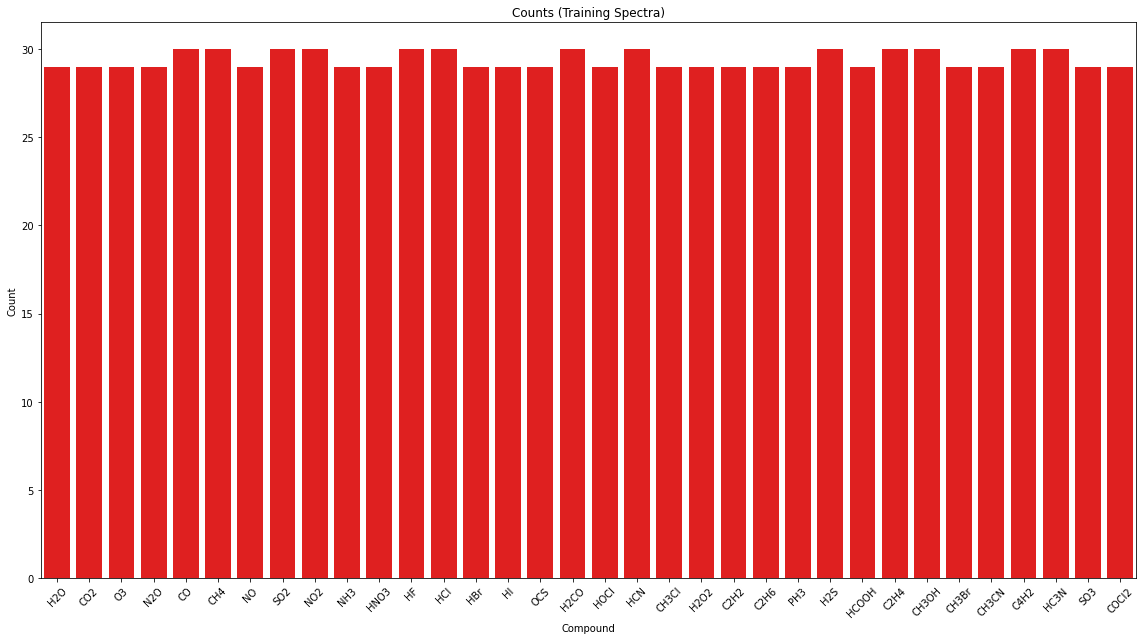

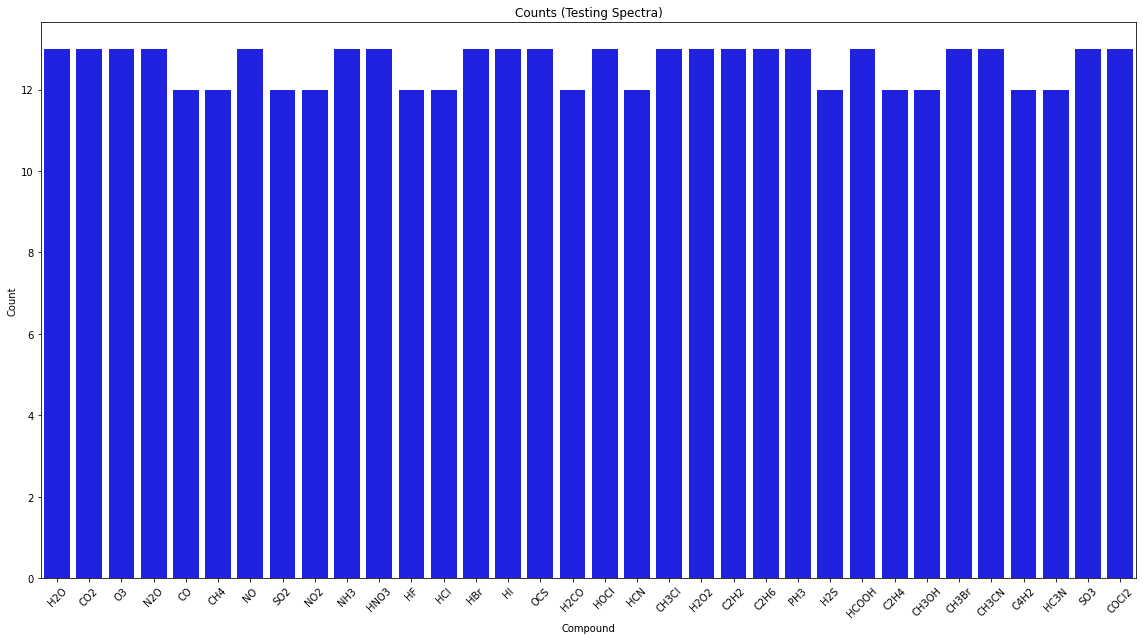

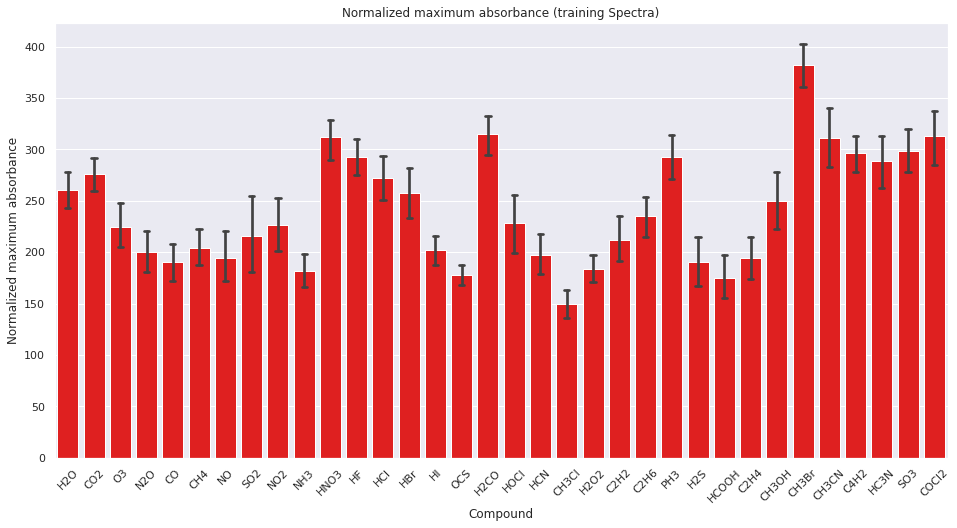

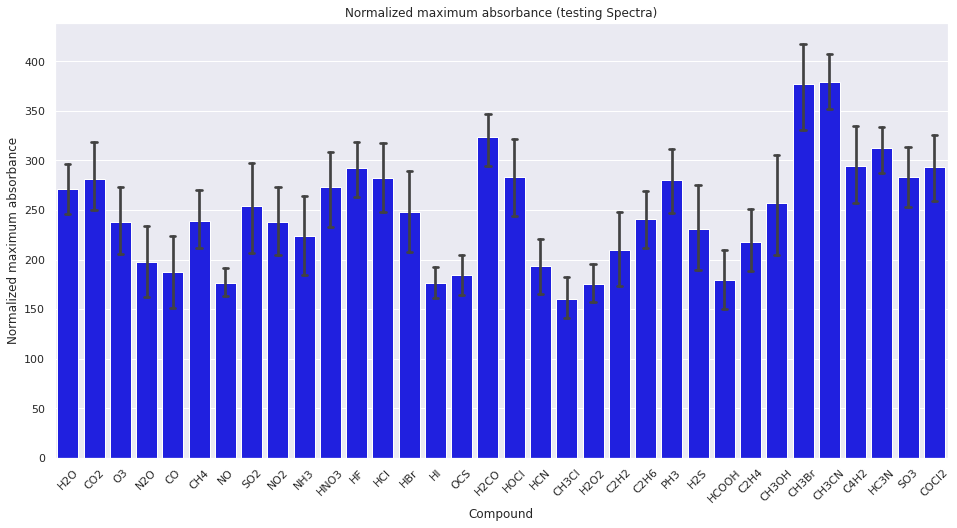

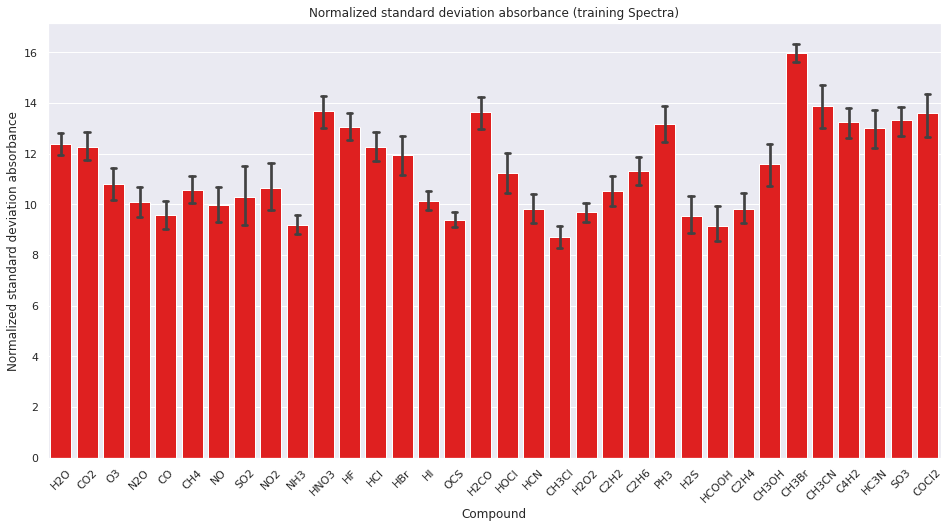

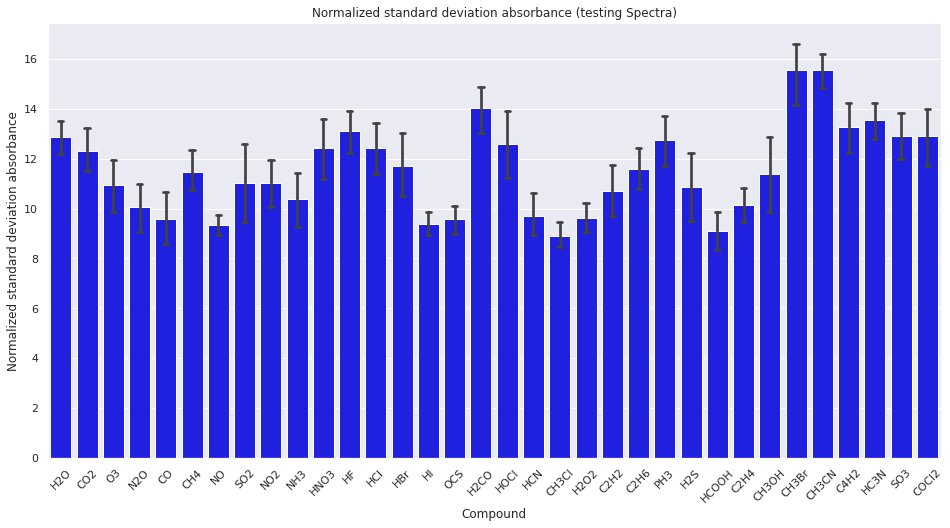

In [10]:
plot_compound_counts(train_sf, 'Counts (Training Spectra)', color = 'red' )
plot_compound_counts(test_sf, 'Counts (Testing Spectra)', color = 'blue' )
plot_dataset_property(train_sf, "norm_max_abs", title = 'Normalized maximum absorbance (training Spectra)',  ylabel = 'Normalized maximum absorbance', color = 'red')
plot_dataset_property(test_sf, "norm_max_abs", title = 'Normalized maximum absorbance (testing Spectra)',  ylabel = 'Normalized maximum absorbance', color = 'blue')
# plot_dataset_property(train_sf, "mean_abs", title = 'Mean Absorbance (Training Spectra)',  ylabel = 'Mean Absorbance')
# plot_dataset_property(test_sf, "mean_abs", title = 'Mean Absorbance (Test Spectra)',  ylabel = 'Mean Absorbance')
plot_dataset_property(train_sf, "norm_std_abs", title = 'Normalized standard deviation absorbance (training Spectra)',  ylabel = 'Normalized standard deviation absorbance', color = 'red')
plot_dataset_property(test_sf, "norm_std_abs", title = 'Normalized standard deviation absorbance (testing Spectra)',  ylabel = 'Normalized standard deviation absorbance', color = 'blue')


# noisy simulated validation data


In [11]:
s.add_sinusoidal_noise()
s.make_dataframe(s.val_sim_spectra)
spectraframe = s.spectraframe
spectraframe['mean_abs'] = spectraframe.drop(labels=['labels','targets'],axis = 1).mean(axis = 0)
# spectraframe['std_abs'] = spectraframe.drop(labels=['labels','targets'],axis = 1).std(axis = 0)
# spectraframe['max_abs'] = spectraframe.drop(labels=['labels','targets'],axis = 1).max(axis = 0)
spectraframe['norm_std_abs'] = spectraframe.drop(labels=['labels','targets'],axis = 1).std(axis = 0)/spectraframe.drop(labels=['labels','targets'],axis = 1).mean(axis = 0)
spectraframe['norm_max_abs'] = spectraframe.drop(labels=['labels','targets'],axis = 1).max(axis = 0)/spectraframe.drop(labels=['labels','targets'],axis = 1).mean(axis = 0)


0.5259086989236167
0.06633580893826191


In [12]:
spectraframe

,0,1,2,3,4,5,6,7,8,9,...,3596,3597,3598,3599,3600,labels,targets,mean_abs,norm_std_abs,norm_max_abs
0,0.005057,0.004967,0.004966,0.004966,0.004966,0.004966,0.004966,0.004966,0.004966,0.004966,...,0.004966,0.004968,0.004966,0.004967,0.004966,H2O,0,2.340982,11.253098,230.896583
1,4.841928,0.934508,0.077400,0.005328,0.022400,0.049201,0.047789,0.010376,0.005633,0.008545,...,0.070313,0.134588,0.019491,0.035197,0.006070,H2O,0,2.191951,12.028194,266.415609
2,0.004967,0.004966,0.004966,0.004966,0.004966,0.004966,0.004966,0.004966,0.004966,0.004966,...,0.004966,0.004966,0.004966,0.004966,0.004966,H2O,0,1.772645,11.338102,201.064429
3,0.098862,0.023706,0.007681,0.005595,0.005276,0.005854,0.005831,0.005076,0.005015,0.005033,...,0.006267,0.007510,0.005258,0.005592,0.004988,H2O,0,3.718272,11.872925,250.152791
4,25.274262,4.759829,0.012279,0.005866,0.101255,0.231993,0.224005,0.031910,0.008402,0.024496,...,0.343189,0.664690,0.065766,0.171088,0.007891,H2O,0,1.091237,11.945283,214.018883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,0.004966,0.004966,0.004966,0.004966,0.004966,0.004966,0.004966,0.004966,0.004966,0.004966,...,0.004966,0.004966,0.004966,0.004966,0.004966,COCl2,33,0.414552,8.661410,180.491963
1424,0.004966,0.004966,0.004966,0.004966,0.004966,0.004966,0.004966,0.004966,0.004966,0.004966,...,0.004966,0.004966,0.004966,0.004966,0.004966,COCl2,33,0.840897,12.941978,340.189991
1425,0.004966,0.004966,0.004966,0.004966,0.004966,0.004966,0.004966,0.004966,0.004966,0.004966,...,0.004966,0.004966,0.004966,0.004966,0.004966,COCl2,33,1.205818,14.626485,380.662959
1426,0.004966,0.004966,0.004966,0.004966,0.004966,0.004966,0.004966,0.004966,0.004966,0.004966,...,0.004966,0.004966,0.004966,0.004966,0.004966,COCl2,33,0.285444,10.051042,217.815413


In [13]:
def f_spectra(spectra_no):
    
    plt.subplot(2,1,1)
    plt.plot(s.frequencies, s.spectra[spectra_no]); #reshape needed so you have 367 datapoints.
    plt.subplot(2,1,2)
    plt.plot(s.frequencies, s.val_sim_spectra[spectra_no]); #reshape needed so you have 367 datapoints.
#     plt.ylim(-0.5, 5)
    plt.grid(True)
    plt.show()

interactive_plot = interactive(f_spectra, spectra_no=(0, s.spectra.shape[0]-1))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=713, description='spectra_no', max=1427), Output()), _dom_classes=('widg…

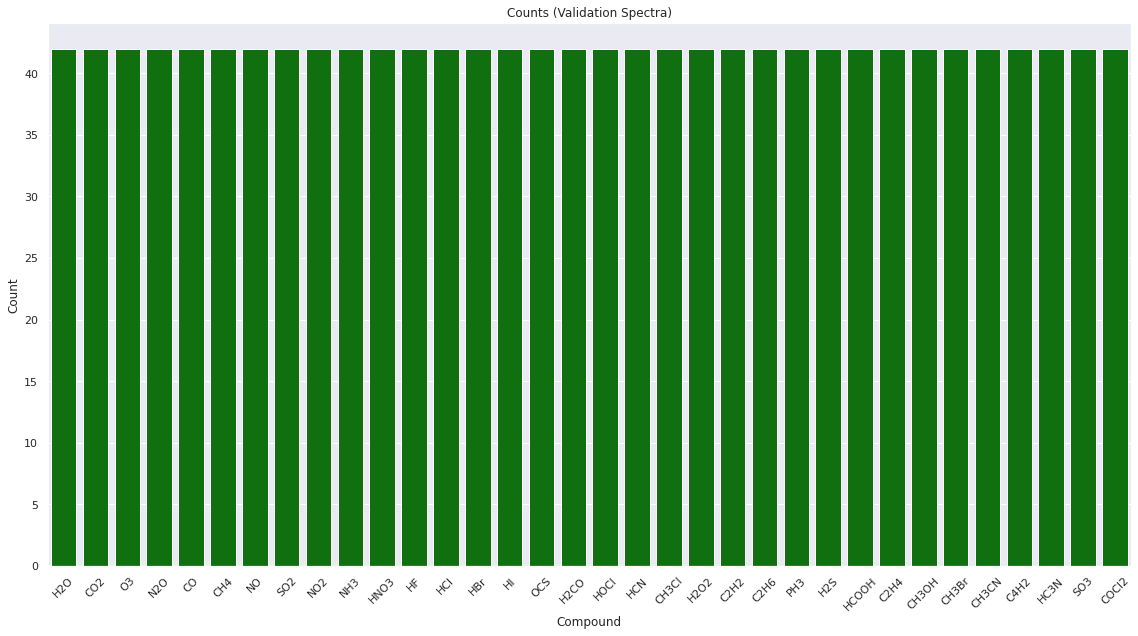

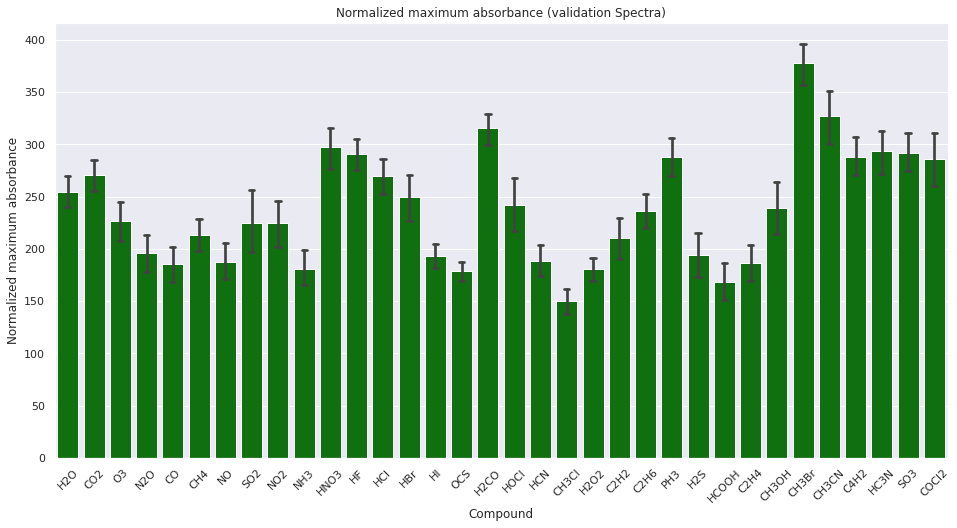

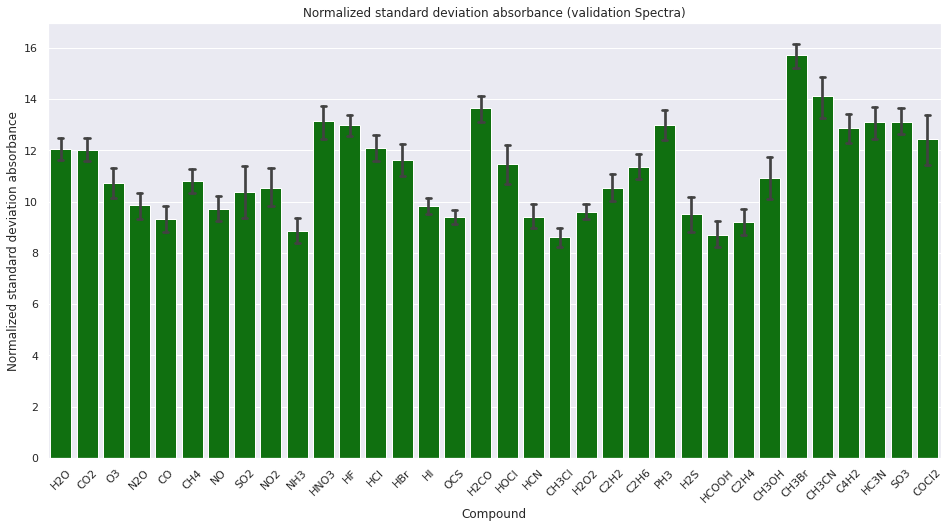

In [32]:
plot_compound_counts(spectraframe, 'Counts (Validation Spectra)', color = 'green' )

plot_dataset_property(spectraframe, "norm_max_abs", title = 'Normalized maximum absorbance (validation Spectra)',  ylabel = 'Normalized maximum absorbance', color = 'green')
plot_dataset_property(spectraframe, "norm_std_abs", title = 'Normalized standard deviation absorbance (validation Spectra)',  ylabel = 'Normalized standard deviation absorbance', color = 'green')
# plot_dataset_property(spectraframe, "mean_abs", title = 'Mean absorbance (validation Spectra)',  ylabel = 'Mean absorbance', color = 'green')



## load IR data for pressure cross-validation, view attributes and visualize data

In [50]:
s = IR_data(data_start = 400, data_end = 4000, resolution=1, verbosity = True, cv_type = 'pressure')
s.load_IR_data()

Front trim : 0.0
End trim : 0.0
Number of Compounds: 34
Number of Spectrum: 10
Total Number of Spectra: 340
Front trim : 0.0
End trim : 0.0
Data Start Input: 400
Data End Input: 4000
Sample Size of training data: 3601
Rows discarded: 0
Resolution (1/cm) =  1.0
Loading H2O... 
H2O Data in Memory 
Loading CO2... 
CO2 Data in Memory 
Loading O3... 
O3 Data in Memory 
Loading N2O... 
N2O Data in Memory 
Loading CO... 
CO Data in Memory 
Loading CH4... 
CH4 Data in Memory 
Loading NO... 
NO Data in Memory 
Loading SO2... 
SO2 Data in Memory 
Loading NO2... 
NO2 Data in Memory 
Loading NH3... 
NH3 Data in Memory 
Loading HNO3... 
HNO3 Data in Memory 
Loading HF... 
HF Data in Memory 
Loading HCl... 
HCl Data in Memory 
Loading HF... 
HBr Data in Memory 
Loading HI... 
HI Data in Memory 
Loading OCS... 
OCS Data in Memory 
Loading H2CO... 
H2CO Data in Memory 
Loading HOCl... 
HOCl Data in Memory 
Loading HCN... 
HCN Data in Memory 
Loading CH3Cl... 
CH3Cl Data in Memory 
Loading H2O2... 
H2O

In [51]:
print('Number of Compounds:', s.n_compounds)
print('Number of Spectrum:', s.n_spectrum)
print('Total Number of Spectra:', s.n_spectra)
print("Front trim :", s.front_trim_amount)
print("End trim :", s.end_trim_amount)
print('Data Start Input:',s.data_start)
print('Data End Input:',s.data_end)           
print('Sample Size of training data:', s.samplesize )
print('Rows discarded:', s.n_discard_rows)
print('Resolution (1/cm) = ', s.resolution)

print('\n labels of molecules present \n', s.labels)
print('\n target indices (integers) of molecules present', s.targets)
print('\n frequencies present in the data \n ', s.frequencies)

Number of Compounds: 34
Number of Spectrum: 10
Total Number of Spectra: 340
Front trim : 0.0
End trim : 0.0
Data Start Input: 400
Data End Input: 4000
Sample Size of training data: 3601
Rows discarded: 0
Resolution (1/cm) =  1.0

 labels of molecules present 
 ['H2O', 'CO2', 'O3', 'N2O', 'CO', 'CH4', 'NO', 'SO2', 'NO2', 'NH3', 'HNO3', 'HF', 'HCl', 'HBr', 'HI', 'OCS', 'H2CO', 'HOCl', 'HCN', 'CH3Cl', 'H2O2', 'C2H2', 'C2H6', 'PH3', 'H2S', 'HCOOH', 'C2H4', 'CH3OH', 'CH3Br', 'CH3CN', 'C4H2', 'HC3N', 'SO3', 'COCl2']

 target indices (integers) of molecules present [ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 

In [52]:
def f_spectra(spectra_no):
    plt.plot(s.frequencies, s.spectra[spectra_no]); #reshape needed so you have 367 datapoints.
#     plt.ylim(-0.5, 5)
    plt.grid(True)
    plt.show()

interactive_plot = interactive(f_spectra, spectra_no=(0, s.spectra.shape[0]-1))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=169, description='spectra_no', max=339), Output()), _dom_classes=('widge…

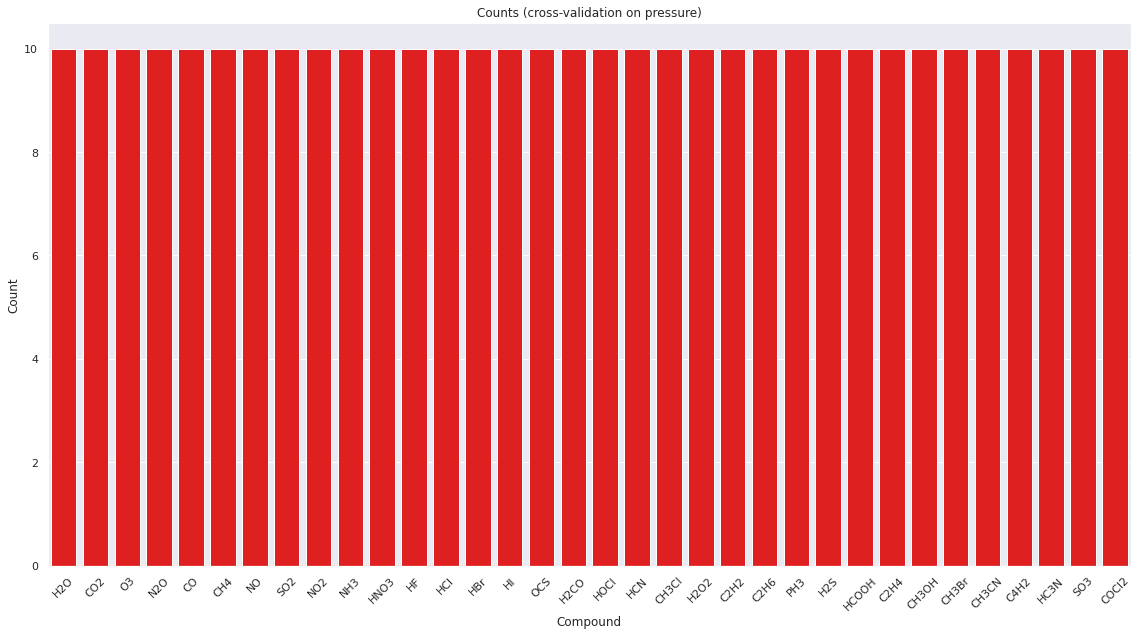

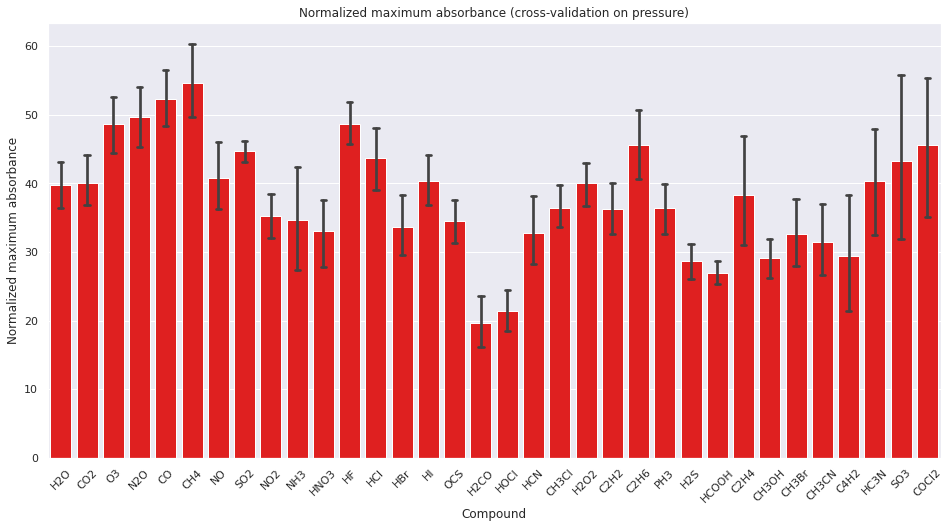

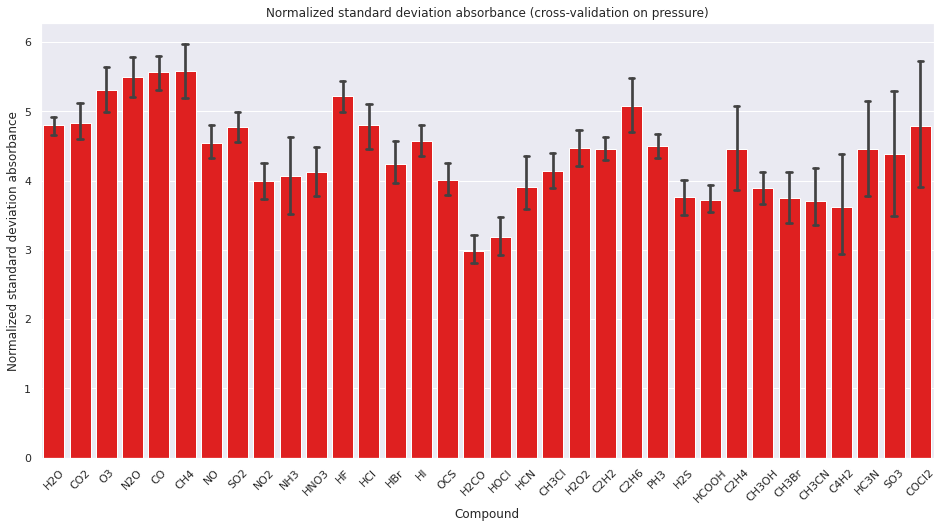

In [53]:
s.make_dataframe(s.spectra)
spectraframe = s.spectraframe
spectraframe['mean_abs'] = spectraframe.drop(labels=['labels','targets'],axis = 1).mean(axis = 0)
spectraframe['norm_std_abs'] = spectraframe.drop(labels=['labels','targets'],axis = 1).std(axis = 0)/spectraframe.drop(labels=['labels','targets'],axis = 1).mean(axis = 0)
spectraframe['norm_max_abs'] = spectraframe.drop(labels=['labels','targets'],axis = 1).max(axis = 0)/spectraframe.drop(labels=['labels','targets'],axis = 1).mean(axis = 0)
plot_compound_counts(spectraframe, 'Counts (cross-validation on pressure)', color = 'red' )

plot_dataset_property(spectraframe, "norm_max_abs", title = 'Normalized maximum absorbance (cross-validation on pressure)',  ylabel = 'Normalized maximum absorbance', color = 'red')

# plot_dataset_property(spectraframe, "mean_abs", title = 'Mean Absorbance (Training Spectra)',  ylabel = 'Mean Absorbance')
plot_dataset_property(spectraframe, "norm_std_abs", title = 'Normalized standard deviation absorbance (cross-validation on pressure)',  ylabel = 'Normalized standard deviation absorbance', color = 'red')

## load IR data for concentration cross-validation, view attributes and visualize data

In [47]:
s = IR_data(data_start = 400, data_end = 4000, resolution=1, verbosity = True, cv_type = 'concentration')
s.load_IR_data()

Front trim : 0.0
End trim : 0.0
Number of Compounds: 34
Number of Spectrum: 7
Total Number of Spectra: 238
Front trim : 0.0
End trim : 0.0
Data Start Input: 400
Data End Input: 4000
Sample Size of training data: 3601
Rows discarded: 0
Resolution (1/cm) =  1.0
Loading H2O... 
H2O Data in Memory 
Loading CO2... 
CO2 Data in Memory 
Loading O3... 
O3 Data in Memory 
Loading N2O... 
N2O Data in Memory 
Loading CO... 
CO Data in Memory 
Loading CH4... 
CH4 Data in Memory 
Loading NO... 
NO Data in Memory 
Loading SO2... 
SO2 Data in Memory 
Loading NO2... 
NO2 Data in Memory 
Loading NH3... 
NH3 Data in Memory 
Loading HNO3... 
HNO3 Data in Memory 
Loading HF... 
HF Data in Memory 
Loading HCl... 
HCl Data in Memory 
Loading HF... 
HBr Data in Memory 
Loading HI... 
HI Data in Memory 
Loading OCS... 
OCS Data in Memory 
Loading H2CO... 
H2CO Data in Memory 
Loading HOCl... 
HOCl Data in Memory 
Loading HCN... 
HCN Data in Memory 
Loading CH3Cl... 
CH3Cl Data in Memory 
Loading H2O2... 
H2O2

In [48]:
print('Number of Compounds:', s.n_compounds)
print('Number of Spectrum:', s.n_spectrum)
print('Total Number of Spectra:', s.n_spectra)
print("Front trim :", s.front_trim_amount)
print("End trim :", s.end_trim_amount)
print('Data Start Input:',s.data_start)
print('Data End Input:',s.data_end)           
print('Sample Size of training data:', s.samplesize )
print('Rows discarded:', s.n_discard_rows)
print('Resolution (1/cm) = ', s.resolution)

print('\n labels of molecules present \n', s.labels)
print('\n target indices (integers) of molecules present', s.targets)
print('\n frequencies present in the data \n ', s.frequencies)

Number of Compounds: 34
Number of Spectrum: 7
Total Number of Spectra: 238
Front trim : 0.0
End trim : 0.0
Data Start Input: 400
Data End Input: 4000
Sample Size of training data: 3601
Rows discarded: 0
Resolution (1/cm) =  1.0

 labels of molecules present 
 ['H2O', 'CO2', 'O3', 'N2O', 'CO', 'CH4', 'NO', 'SO2', 'NO2', 'NH3', 'HNO3', 'HF', 'HCl', 'HBr', 'HI', 'OCS', 'H2CO', 'HOCl', 'HCN', 'CH3Cl', 'H2O2', 'C2H2', 'C2H6', 'PH3', 'H2S', 'HCOOH', 'C2H4', 'CH3OH', 'CH3Br', 'CH3CN', 'C4H2', 'HC3N', 'SO3', 'COCl2']

 target indices (integers) of molecules present [ 0  0  0  0  0  0  0  1  1  1  1  1  1  1  2  2  2  2  2  2  2  3  3  3
  3  3  3  3  4  4  4  4  4  4  4  5  5  5  5  5  5  5  6  6  6  6  6  6
  6  7  7  7  7  7  7  7  8  8  8  8  8  8  8  9  9  9  9  9  9  9 10 10
 10 10 10 10 10 11 11 11 11 11 11 11 12 12 12 12 12 12 12 13 13 13 13 13
 13 13 14 14 14 14 14 14 14 15 15 15 15 15 15 15 16 16 16 16 16 16 16 17
 17 17 17 17 17 17 18 18 18 18 18 18 18 19 19 19 19 19 19 19 20 20 20 2

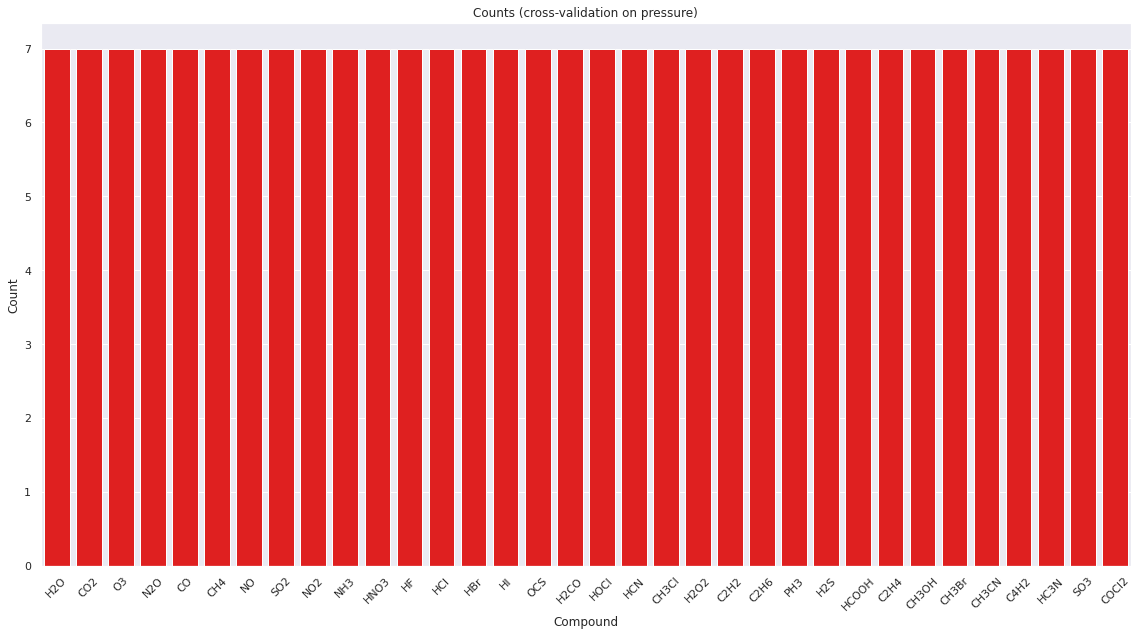

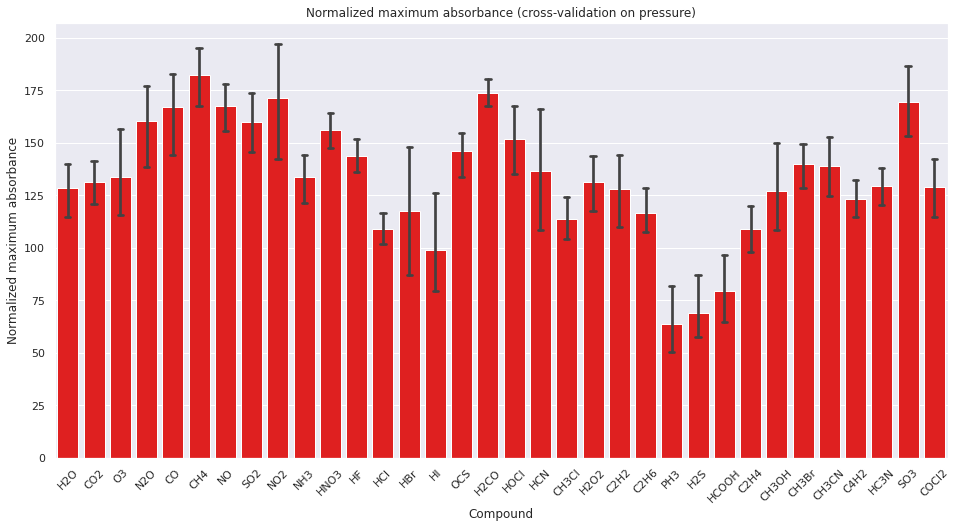

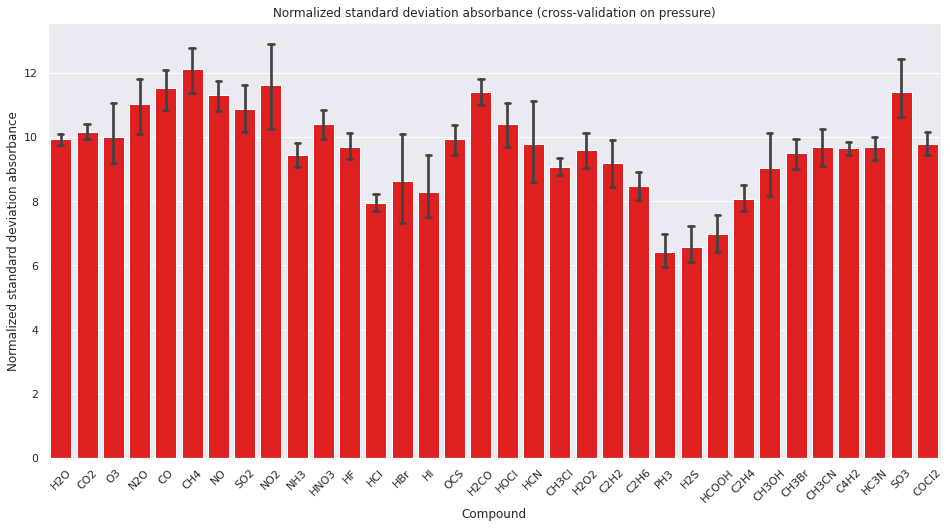

In [49]:
s.make_dataframe(s.spectra)
spectraframe = s.spectraframe
spectraframe['mean_abs'] = spectraframe.drop(labels=['labels','targets'],axis = 1).mean(axis = 0)
spectraframe['norm_std_abs'] = spectraframe.drop(labels=['labels','targets'],axis = 1).std(axis = 0)/spectraframe.drop(labels=['labels','targets'],axis = 1).mean(axis = 0)
spectraframe['norm_max_abs'] = spectraframe.drop(labels=['labels','targets'],axis = 1).max(axis = 0)/spectraframe.drop(labels=['labels','targets'],axis = 1).mean(axis = 0)
plot_compound_counts(spectraframe, 'Counts (cross-validation on concentration)', color = 'red' )

plot_dataset_property(spectraframe, "norm_max_abs", title = 'Normalized maximum absorbance (cross-validation on concentration)',  ylabel = 'Normalized maximum absorbance', color = 'red')

# plot_dataset_property(spectraframe, "mean_abs", title = 'Mean Absorbance (Training Spectra)',  ylabel = 'Mean Absorbance')
plot_dataset_property(spectraframe, "norm_std_abs", title = 'Normalized standard deviation absorbance (cross-validation on concentration)',  ylabel = 'Normalized standard deviation absorbance', color = 'red')

# experimental data

In [4]:
path_exp = "../../data/IR_Experimental_Data/"

freq_H2O, abs_H2O = load_exp_spectra(path_exp, 'H2O-4-NIST.xlsx')
freq_CO2, abs_CO2 = load_exp_spectra(path_exp, 'CO2-4-NIST.xlsx')
freq_CO, abs_CO = load_exp_spectra(path_exp, 'CO-4-NIST.xlsx')
freq_N2O, abs_N2O = load_exp_spectra(path_exp, 'B_N2O-1-NIST.xlsx')

freq_CH4, abs_CH4 = load_exp_spectra(path_exp, 'CH4-1.xlsx')
freq_NO, abs_NO = load_exp_spectra(path_exp, 'B_NO-1-NIST.xlsx')
freq_NH3, abs_NH3 = load_exp_spectra(path_exp, 'B_NH3-4.xlsx')
freq_H2CO, abs_H2CO = load_exp_spectra(path_exp, 'H2COUnknown.xlsx')

freq_CH3Cl, abs_CH3Cl = load_exp_spectra(path_exp, 'CH3CL.xlsx')
freq_HBr, abs_HBr = load_exp_spectra(path_exp, 'HBr.xlsx')
freq_OCS, abs_OCS = load_exp_spectra(path_exp, 'OCS.xlsx')
freq_C2H2, abs_C2H2 = load_exp_spectra(path_exp, 'C2H2.xlsx')

freq_C2H4, abs_C2H4 = load_exp_spectra(path_exp, 'C2H4.xlsx')
freq_C2H6, abs_C2H6 = load_exp_spectra(path_exp, 'C2H6_upto_2400.xlsx')
freq_SO2, abs_SO2 = load_exp_spectra(path_exp, 'SO2.xlsx')
freq_O3, abs_O3 = load_exp_spectra(path_exp, 'O3-4.xlsx')

freq_HCl, abs_HCl = load_exp_spectra(path_exp, 'HCl_25T_Full_Shift.xlsx')
freq_H2S, abs_H2S = load_exp_spectra(path_exp, 'H2S.xlsx')
freq_CH3Br, abs_CH3Br = load_exp_spectra(path_exp, 'CH3Br_Short.xlsx')
freq_HC3N, abs_HC3N = load_exp_spectra(path_exp, 'HC3N.xlsx')



In [5]:
exp_means = [np.mean(abs_H2O),np.mean(abs_CO2),np.mean(abs_CO),np.mean(abs_N2O),
np.mean(abs_CH4),np.mean(abs_NO),np.mean(abs_NH3),np.mean(abs_H2CO),
np.mean(abs_CH3Cl),np.mean(abs_HBr),np.mean(abs_OCS),np.mean(abs_C2H2),
np.mean(abs_C2H4),np.mean(abs_C2H6),np.mean(abs_SO2),np.mean(abs_O3),
np.mean(abs_HCl),np.mean(abs_H2S),np.mean(abs_CH3Br),np.mean(abs_HC3N)]





In [6]:
exp_maxs = [np.max(abs_H2O),np.max(abs_CO2),np.max(abs_CO),np.max(abs_N2O),
np.max(abs_CH4),np.max(abs_NO),np.max(abs_NH3),np.max(abs_H2CO),
np.max(abs_CH3Cl),np.max(abs_HBr),np.max(abs_OCS),np.max(abs_C2H2),
np.max(abs_C2H4),np.max(abs_C2H6),np.max(abs_SO2),np.max(abs_O3),
np.max(abs_HCl),np.max(abs_H2S),np.max(abs_CH3Br),np.max(abs_HC3N)]


In [7]:
exp_stds = [np.std(abs_H2O),np.std(abs_CO2),np.std(abs_CO),np.std(abs_N2O),
np.std(abs_CH4),np.std(abs_NO),np.std(abs_NH3),np.std(abs_H2CO),
np.std(abs_CH3Cl),np.std(abs_HBr),np.std(abs_OCS),np.std(abs_C2H2),
np.std(abs_C2H4),np.std(abs_C2H6),np.std(abs_SO2),np.std(abs_O3),
np.std(abs_HCl),np.std(abs_H2S),np.std(abs_CH3Br),np.std(abs_HC3N)]





In [8]:
exp_labels = ['H2O','CO2','CO','N2O',
'CH4','NO','NH3','H2CO',
'CH3Cl','HBr','OCS','C2H2',
'C2H4','C2H6','SO2','O3',
'HCl','H2S','CH3Br','HC3N']

In [9]:
exp_norm_max_abs =  np.array(exp_maxs)/np.array(exp_means)

In [10]:
exp_norm_std_abs =  np.array(exp_stds)/np.array(exp_means)

In [11]:
exp_df = pd.DataFrame()
exp_df['mean_abs'] = exp_means
exp_df['norm_max_abs'] = exp_norm_max_abs
exp_df['norm_std_abs'] = exp_norm_std_abs
exp_df['labels'] = exp_labels


In [12]:
exp_df

,mean_abs,norm_max_abs,norm_std_abs,labels
0,0.081231,7.735149,1.314195,H2O
1,0.059220,29.461653,4.091978,CO2
2,0.025297,33.033683,4.123621,CO
3,0.107158,19.518104,2.061569,N2O
4,0.028649,54.202735,2.937311,CH4
5,0.050690,12.480565,1.544899,NO
6,0.085450,19.634653,0.989428,NH3
7,0.168542,15.768038,1.750274,H2CO
8,0.054759,19.366214,2.669172,CH3Cl
9,0.029375,14.620050,1.414105,HBr


(<Figure size 1152x648 with 1 Axes>,
 <AxesSubplot:title={'center':'counts (experimental spectra)'}, xlabel='Compound', ylabel='Count'>)

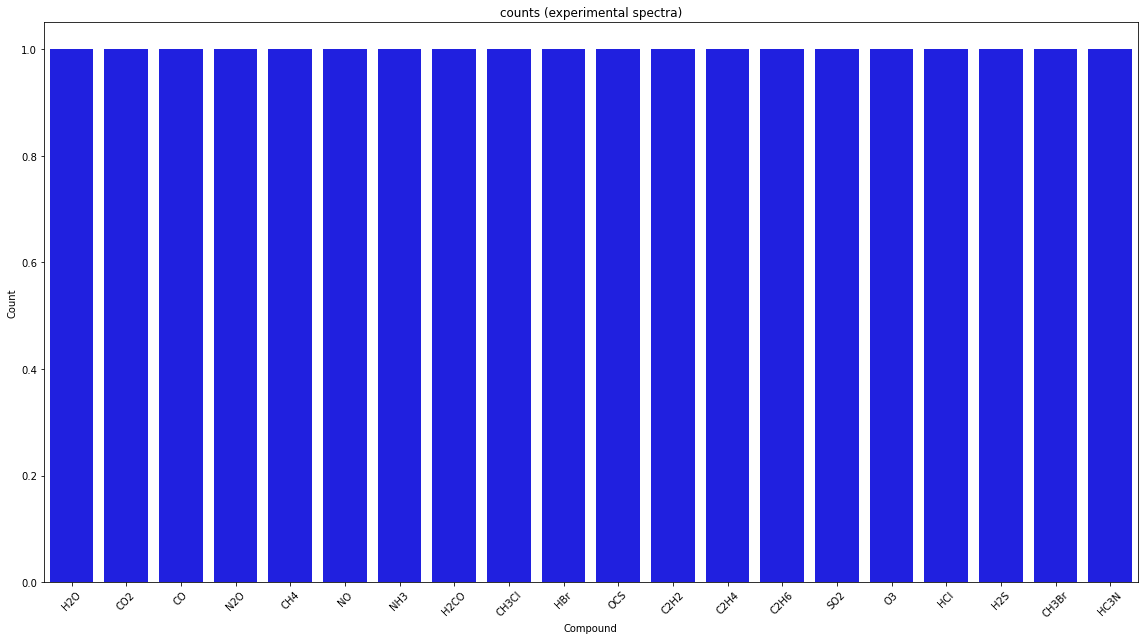

In [13]:
plot_compound_counts(exp_df, title = 'counts (experimental spectra)', color = 'blue', save_to_file = True)

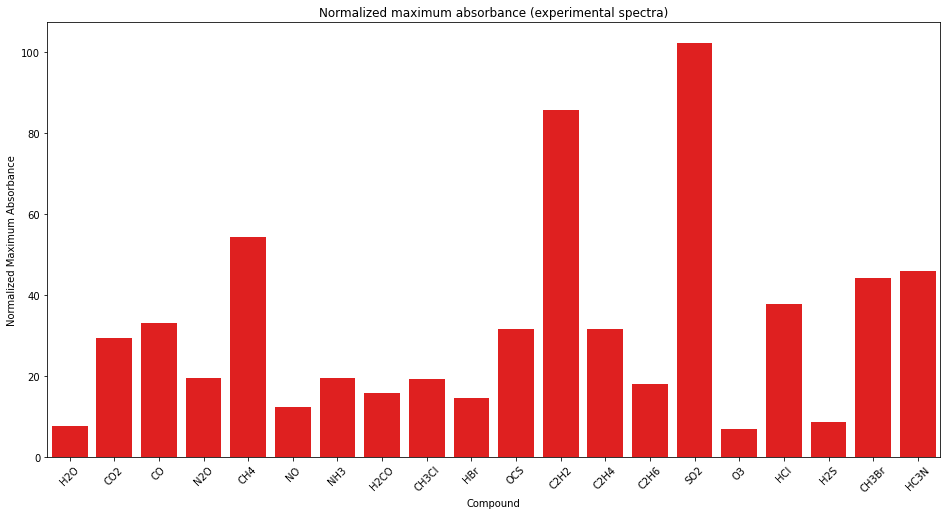

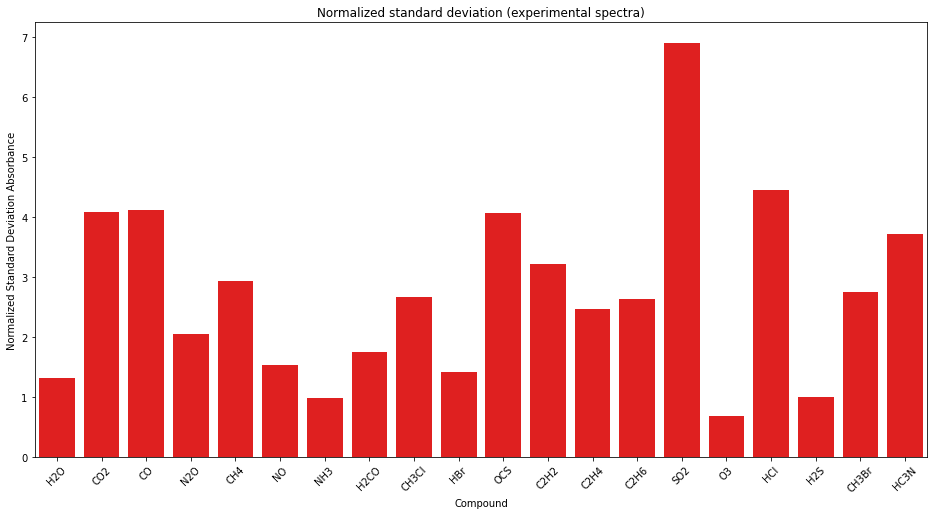

In [14]:
plot_dataset_property(exp_df, 'norm_max_abs', title = 'Normalized maximum absorbance (experimental spectra)',  ylabel = 'Normalized Maximum Absorbance', color = 'red', save_to_file = True)    
plot_dataset_property(exp_df, 'norm_std_abs', title = 'Normalized standard deviation (experimental spectra)',  ylabel = 'Normalized Standard Deviation Absorbance', color = 'red', save_to_file = True)    

## notebook ends